In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Verileri 0-1 aralığına ölçekle
x_train = x_train / 255.0
x_test = x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # 28x28 -> 784
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # Aşırı öğrenmeyi engellemek için
    layers.Dense(10, activation='softmax')  # 10 sınıf (0-9)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              #metrics=['accuracy'])


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9895 - loss: 0.0350 - val_accuracy: 0.9883 - val_loss: 0.0424
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9880 - loss: 0.0383 - val_accuracy: 0.9889 - val_loss: 0.0418
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9900 - loss: 0.0309 - val_accuracy: 0.9874 - val_loss: 0.0479
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9895 - loss: 0.0344 - val_accuracy: 0.9885 - val_loss: 0.0450
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9901 - loss: 0.0313 - val_accuracy: 0.9883 - val_loss: 0.0524


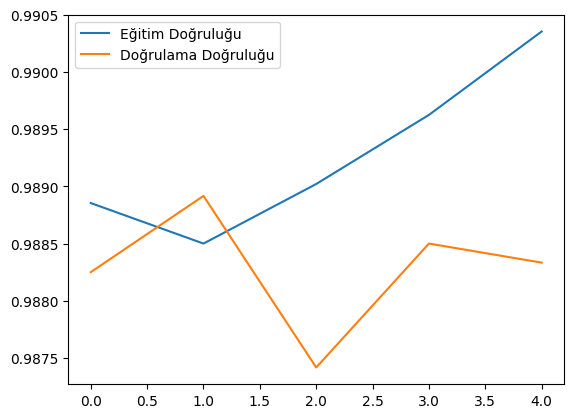

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)
#model.fit(x_train, y_train ,validation_split=0.2, epochs=5, callbacks=[early_stop])


history = model.fit(x_train, y_train, validation_split=0.2, epochs=5, callbacks=[early_stop])
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.show()

#model.fit(x_train, y_train, epochs=5)


In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test doğruluğu: {test_acc:.2f}")


313/313 - 1s - 2ms/step - accuracy: 0.9788 - loss: 0.0906
Test doğruluğu: 0.98


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


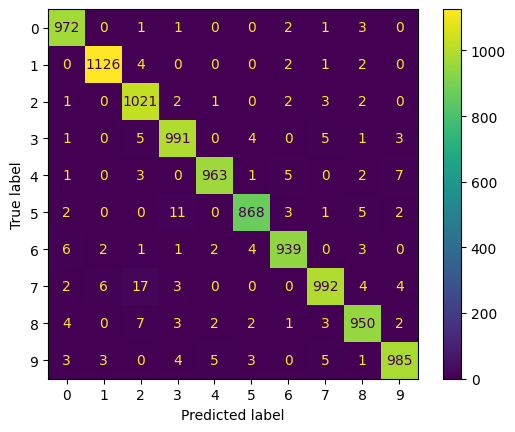

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
ConfusionMatrixDisplay(cm).plot()


In [27]:
y_pred[0]

array([7.81024334e-13, 1.64989133e-15, 6.46470507e-12, 1.17623520e-08,
       1.10039004e-23, 1.08775751e-14, 4.84891316e-22, 9.99999940e-01,
       4.04411578e-14, 1.91862104e-09], dtype=float32)